### Cross Validation 

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

#### Types of Cross Validation

1. **K-Fold** cross-validation: Most common
2. **Leave One Out (LOO)**: Takes each data point as the 'test sample' once, and trains the model on the rest n-1 data points. Thus, it trains n total models.
    - Advantage: Utilises the data well since each model is trained on n-1 samples
    - Disadvantage: Computationally expensive
3. **Leave P-Out (LPO)**: Creat all possible splits after leaving p samples out. For n data points, there are (nCp) possibile train-test splits.
4. (**For classification problems**) **Stratified K-Fold**: Ensures that the relative class proportion is approximately preserved in each train and validation fold. Important when there is huge class imbalance (e.g. 98% good customers, 2% bad).


#### First let us conduct a linear regression without Cross-Validation:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#list all the Yes - No binary features and map them to Yes:1 and No:0
binary_vars_list =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#Define the map function

def binary_map(x):
    return x.map({'yes':1,'no':0})
# applying the function to the housing variables list
df[binary_vars_list] = df[binary_vars_list].apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [5]:
# get dummy variables for 'furnishingstatus' 
# also, drop the first column of the resulting df (since n-1 dummy vars suffice)
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [6]:
# concat the dummy variable df with the main df
df = pd.concat([df,status],axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [7]:
# Drop the furnishingstatus
df.drop('furnishingstatus',axis=1,inplace =True)

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


Split the data into Train & Test Split

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [10]:
# 70-30 train-test split
df_train,df_test = train_test_split(df,train_size = 0.7,test_size = 0.3,random_state=100)

#rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [11]:
# apply rescaling to the test set also
df_test[numeric_vars] = scaler.fit_transform(df_test[numeric_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.247651,0.084536,0.333333,0.000000,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.530201,0.298969,0.333333,0.333333,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.328859,0.592371,0.333333,0.000000,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.261745,0.252234,0.333333,0.000000,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.245638,0.226804,0.666667,0.000000,0.333333,1,0,0,0,1,0.000000,0,1,0


In [12]:
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

#### Building model using RFE

In [13]:
# first let us see how many columns we have in the dataset
X_train.shape

(381, 13)

RFE is a feature elimination technique and here we first let us randomly select 10 columns from the dataset for the
further processing
`Note: The number of features to be used in the model is called hyperparameter.`

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select = 10)
rfe = rfe.fit(X_train,y_train)

In [16]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) #We can see what are the columns that RFE has selected

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [17]:
#Now, predict the price of X_test
y_pred = rfe.predict(X_test)
# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.5812051458999572


In [18]:
# However, I am not happy with the score and would like to run the model again with another set of column. This time I
#randomly select RFE = 7

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=7)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.5423130920145856


We can see that in this approach, we can have access to test dataset repeatedly while tuning the hyperparameter which is not correct for the model. Also splitting the data into train test split or splitting into train,validation & test is ok until we have a bigger dataset. If we have less data than it can become a problem.

Also, when we split the data into train-test split, we use `random_state` function. If we change the value of `random_state`, accuracy of the model also will get changed.



Hence, we introduce Cross Validation. In cross-validation, split the data into train and test sets and then train multiple models by sampling the train set. Finally,just use the test set to test the hyperparameter once.

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [20]:
# k-fold CV (using all the 13 variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores      

array([0.6829775 , 0.69324306, 0.6762109 , 0.61782891, 0.59266171])

In [21]:
# the other way of doing the same thing (more explicit)
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.59930574, 0.71307628, 0.61325733, 0.62739077, 0.6212937 ])

We can see that there are two way of doing the same task. However, there are difference in result as how it considers the k fold. 
We can actually take an average from the list of the scores and report it as a r2 score of the train model.
Also, we can report the max or min r2 score from the model of train dataset

Since we have mentioned as scoring = 'r2', here sklearn knows that we require r2 score. However, we can use other method like MSE and for classification problems we can use accuracy,precision,recall, AOC etc

In [22]:
# example with MSE. For mean_squared_error, use neg_mean_squared_error.
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.00806336, -0.00658776, -0.0064797 , -0.0070743 , -0.01523682])

### Cross-Validation: Hyperparameter Tuning

A common use of cross-validation is for tuning hyperparameters of a model. In this case we have 13 features. But we dont know
How many features will be an optimal choice for the model. Hence, to figure out that, we will be taking help of cross validation.

As per Wikipedia, “hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm”.

The two main methods of hyperparameter tuning are:

     1.Grid Search CV
     2.Random Search CV

However, here we will be discussing about only Grid Search CV

#### Grid Search CV

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
# First figure out the number of columns in the train set
len(X_train.columns)

13

Since, we have only 13 columns, we can have our hyperparameter max with 13 features

In [25]:
# step-1: create a cross-validation scheme. Here 5 fold cross validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, # estimator basically is a model. It can be Linear Reg/Logistic Reg. Here it is RFE
                        param_grid = hyper_params, # param_grid or parameter grid where we supply the list named as hyper_params
                        scoring= 'r2', # in each iteration of k-fold score validation, calculate r2
                        cv = folds,  # folds is the cross validation scheme which mentioned in first step
                        verbose = 1, #optional argument
                        return_train_score=True)    #   return_train_score gives the r2 of train set. While comparing train set
                                                    #set r2 with test set r2, we can understand that if there is any overfitting
                                                    # that taken place while doing hyperparameter tuning

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [26]:
model_cv.best_score_

0.6367789817089998

In [27]:
model_cv.best_params_

{'n_features_to_select': 12}

In [28]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.sort_values('mean_test_score',axis=0,ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
11,0.002792,3.990175e-04,0.000798,3.989935e-04,12,{'n_features_to_select': 12},0.602951,0.713417,0.613593,0.631241,...,0.636779,0.039457,1,0.694118,0.672213,0.688391,0.685966,0.683639,0.684865,0.007223
12,0.002793,3.992797e-04,0.001396,4.887918e-04,13,{'n_features_to_select': 13},0.599306,0.713076,0.613257,0.627391,...,0.634865,0.040220,2,0.694368,0.672234,0.688467,0.686242,0.683746,0.685011,0.007292
10,0.003391,4.886750e-04,0.000998,2.336015e-07,11,{'n_features_to_select': 11},0.578083,0.707264,0.608905,0.621282,...,0.624864,0.043599,3,0.689850,0.669391,0.683932,0.683890,0.682286,0.681870,0.006752
8,0.004993,6.406833e-04,0.001191,3.857858e-04,9,{'n_features_to_select': 9},0.578843,0.694189,0.606220,0.590777,...,0.615352,0.040767,4,0.676043,0.652605,0.659579,0.668996,0.664321,0.664309,0.007988
9,0.004189,3.991366e-04,0.000997,6.304497e-04,10,{'n_features_to_select': 10},0.574376,0.693197,0.601972,0.594335,...,0.608547,0.043498,5,0.686032,0.661729,0.674558,0.678443,0.677153,0.675583,0.007910
7,0.006381,1.623905e-03,0.000997,9.772254e-07,8,{'n_features_to_select': 8},0.570639,0.665608,0.592323,0.550001,...,0.591795,0.039428,6,0.674146,0.640825,0.654028,0.658665,0.657277,0.656988,0.010651
6,0.006383,1.017093e-03,0.001197,3.988028e-04,7,{'n_features_to_select': 7},0.568887,0.664093,0.552385,0.534634,...,0.577636,0.045006,7,0.658577,0.638501,0.630137,0.646285,0.638313,0.642363,0.009582
4,0.007181,7.465824e-04,0.001197,7.464549e-04,5,{'n_features_to_select': 5},0.494779,0.610200,0.492807,0.590812,...,0.541889,0.049257,8,0.620038,0.597033,0.584663,0.549413,0.589397,0.588109,0.022847
5,0.011968,8.053238e-03,0.001396,4.886949e-04,6,{'n_features_to_select': 6},0.512477,0.628849,0.488411,0.527379,...,0.541063,0.048029,9,0.626959,0.603122,0.596348,0.606852,0.601063,0.606869,0.010602
3,0.005985,8.662177e-07,0.000998,5.761645e-07,4,{'n_features_to_select': 4},0.449487,0.567101,0.494461,0.600237,...,0.526272,0.053074,10,0.587523,0.564018,0.549490,0.541496,0.549291,0.558364,0.016296


Each row in the above dataframe is the output of hyperparameter. Check the `mean_test_score` which provides the average
of all the 5 scores of Grid Search CV.

Also the `mean_train_score` providing the train set r2 score as we mentioned to provide this information 

since, the dataframe is hard to consume, let us visualize this

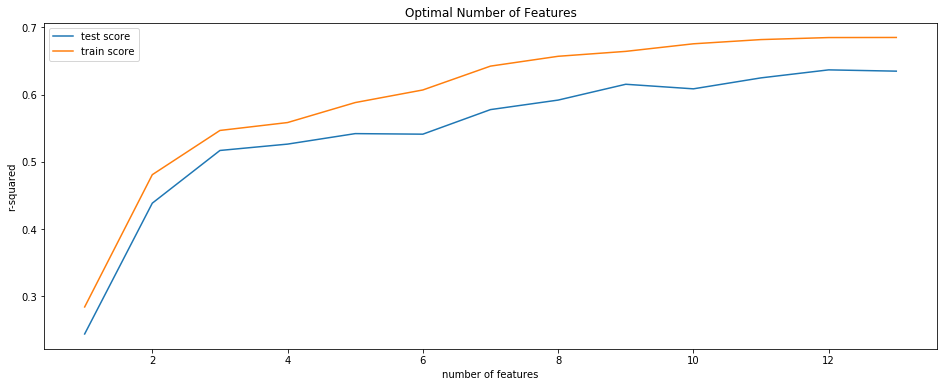

In [29]:
# plotting cv results
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left') 

'test score' and  'train score' is 'mean_test_score' and 'mean_train_score'

The more high r2, the more complex model and tends to overfit. On the other hand, less r2 is more simple model or we have high biased model.

Hence, as per considering bias and variance trade off, we can tell that optimal number of features in this case is near 10. From `model_cv.best_params_` we already seen that optimal number of features is 12

In [30]:
# final model
n_features_optimal = 12

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.5995575338728532
